# Network simulator

This notebooks contains an example of a network model simulator


In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import numpy as np

from rf_network_simulator.network_simulator import NetworkSimulator,RenderingOptions
from rf_network_simulator.rf_network import NodesDistributionParams
from rf_network_simulator import propogation_models as pmodels
from rf_network_simulator import simple_height_map_generator as hmgen


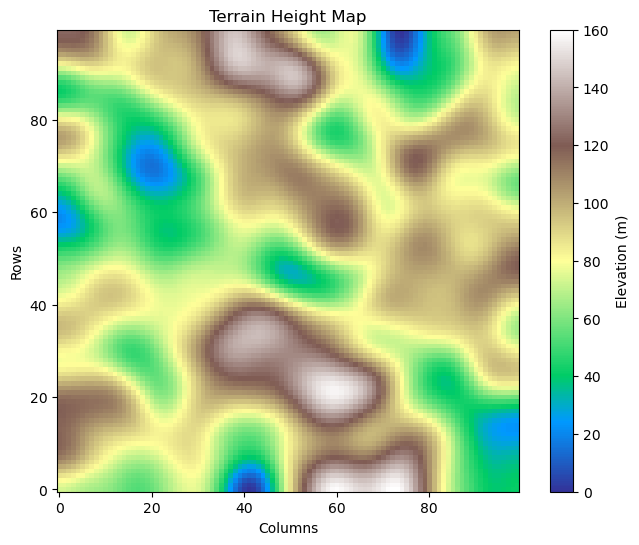

In [2]:
terrain_map = hmgen.generate_terrain_height_map(size=(100, 100), max_elevation=160, smoothness=5)
hmgen.visualize_terrain_height_map(terrain_map)


Processing: 100%|██████████| 120/120 [00:32<00:00,  3.66it/s, accuracy=0.938]


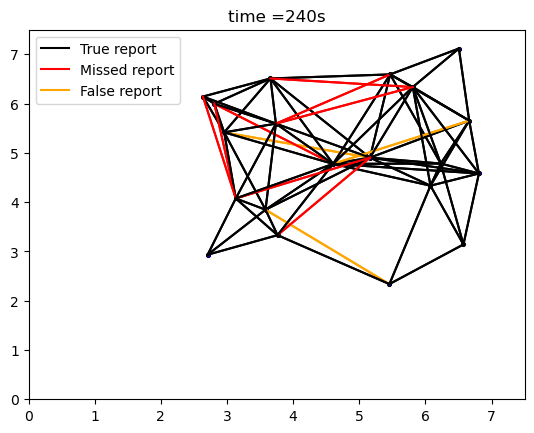

In [26]:

from rf_network_simulator.rf_network import NodeTypeDistribution


# np.random.seed(1)



update_rate = 15*60 # nodes update every 15 minutes

total_time = 120
# total_time = update_rate*10


dist = NodesDistributionParams(area_size_x=5,area_size_y=5,start_x=2.5,start_y=2.5,nodes_minimal_distance=0.002,node_types=[NodeTypeDistribution(20,2.5,(0,5.0/3.6))])

# propogation_model = pmodels.PropogationModelLonglyRice(terrain_map,(10,10))
# propogation_model = pmodels.PropogationModelFreeSpace()
propogation_model = pmodels.PropogationModelEgli()

sim = NetworkSimulator(simulation_rate=2,update_rate=update_rate,frequency=200,propogation_model=propogation_model,distribution_params=dist)

output_video_opts=RenderingOptions(file_name="output_egli2.mp4")
# output_video_opts=None
res=sim.full_simulation(steps_count=total_time,output_video_opts=output_video_opts)



In [18]:
from rf_network_simulator import propogation_models

model =propogation_models.PropogationModelEgli()

res=model(np.array([0,0])[None,:],np.array([2.0,0])[None,:],200,np.array([2.5]),np.array([2.5]))
print(res)

[130.14419939]
